# Project II: Investigate a Dataset (No show Appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row


In [110]:
# This cell is used for importation of all the packages used.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [111]:
# Loading of data and print out of the head. 
df=pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# This cell checks the shape of the data, in order to assert the number of observations(rows) and features(columns) it contains

df.shape

(110527, 14)

In [112]:
#This cell Reviews data types and look for any missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [113]:
#this cell confirms if there are any missing values present
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [118]:
#this cell checks if there are any duplicated observations in the dataset 
df.duplicated().sum()

0

In [120]:
#this cell provides a summary statistics of the categorical/numerical columns in the dataset
df.describe()

,patient_id,appointment_id,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning 

In [114]:
#this cell return a list of the features
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [115]:
#this cell makes changes to the column names for easy coding
df.columns=['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show']

In [122]:
#this cell chages the dtype of the datetime columns
df["scheduled_day"]=pd.to_datetime(df["scheduled_day"])
df["scheduled_day"].dtype

datetime64[ns, UTC]

In [123]:
df["appointment_day"]=pd.to_datetime(df["appointment_day"])
df["appointment_day"]=pd.to_datetime(df["appointment_day"].dt.date)
df["appointment_day"].dtype

dtype('<M8[ns]')

<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1: How many unique neighbourhood does our dataset span across?

In [124]:
#this cells dteremines the number of unique neighbournood in the dataset
df['neighbourhood'].nunique()

81

### Research Question 2: what is the age of the youngest patient?

In [125]:
#this cell determines the age of the youngest patient
df['age'].min()

-1

In [126]:
#this cell brings out information about the age returned in the above cell
df[df["age"]==-1]

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


#### since age cannot be negative, it is most likely there was an error when gathering the data for this observation. Hence, this row will be dropped.


In [127]:
#this cell drops the above observation with age == -1
df.drop(99832,inplace=True)

In [132]:
#this cell finds out the youngest patients after dropping the observation with age == -1
len(df[df['age']==df['age'].min()])

3539

#### The above output shows that there are 3539 infants of less than a year old(both genders) as patients 


### Research Question 3: How many Female and Male patients are there in the dataset?

In [133]:
#this cell returns the value counts of the male and female patients
df["gender"].value_counts()

F    71839
M    38687
Name: gender, dtype: int64

### Research Question 4: How old is the oldest Female and Male patients? 

In [134]:
#this cell return the ages of the olderst male and female patient
df.groupby("gender")["age"].max()

gender
F    115
M    100
Name: age, dtype: int64

### Research Question 5: Grouped by gender, how many patients have hypertension?


gender  hipertension
F       1               15339
M       1                6462
Name: hipertension, dtype: int64




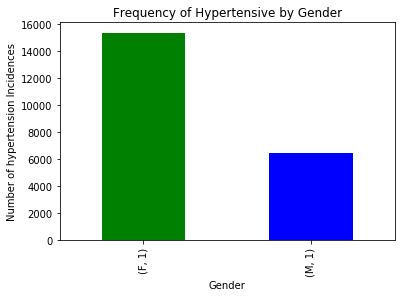

In [29]:
#this code returns the plot of the patients with hypertension, grouped by gender
hiper_data=df[df['hipertension']==1].groupby("gender")["hipertension"].value_counts()
print(hiper_data)
print("\n")
hiper_data.plot(kind='bar',title='Frequency of Hypertensive by Gender',color=['Green','blue'])
plt.xlabel('Gender')
plt.ylabel('Number of hypertension Incidences');

### Research Question 6: Grouped by gender, how many patients have Diatetes?

gender  diabetes
F       1           5606
M       1           2337
Name: diabetes, dtype: int64




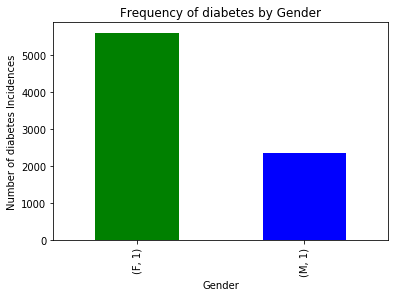

In [31]:
#this code returns the plot of the patients with diabetes, grouped by gender
diabetes_data=df[df['diabetes']==1].groupby("gender")["diabetes"].value_counts()
print(diabetes_data)
print("\n")
diabetes_data.plot(kind='bar',title='Frequency of diabetes by Gender',color=['Green','blue'])
plt.xlabel('Gender')
plt.ylabel('Number of diabetes Incidences');

### Research Question 7: Grouped by gender, how many patients are alcoholics?

gender  alcoholism
F       1             1223
M       1             2137
Name: alcoholism, dtype: int64




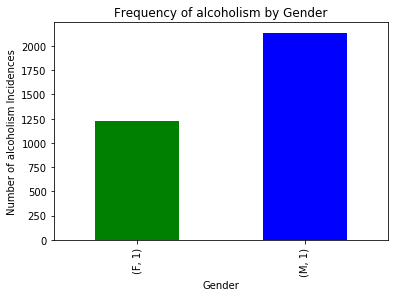

In [32]:
#this code returns the plot of the patients with alcoholism, grouped by gender
alcoholism_data=df[df['alcoholism']==1].groupby("gender")["alcoholism"].value_counts()
print(alcoholism_data)
print("\n")
alcoholism_data.plot(kind='bar',title='Frequency of alcoholism by Gender',color=['Green','blue'])
plt.xlabel('Gender')
plt.ylabel('Number of alcoholism Incidences');

### Research Question 8:  how many patients are alcoholics, diabetic and also hypertensive?

In [136]:
#this code computes the number of alcoholic,diabetic and hypertensive patients
len(df[(df["hipertension"]==1) & (df["diabetes"]==1) & (df["alcoholism"]==1)])

256

### Research Question 9: In what neighborhoods are appointments most frequently scheduled? What are the least frequently scheduled neighborhoods?

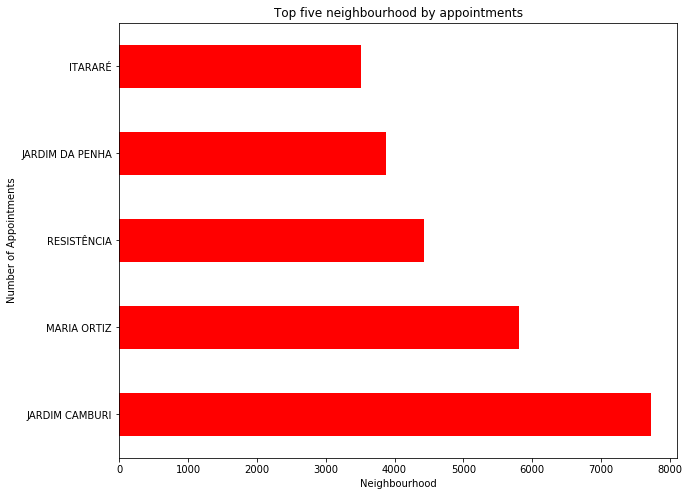

In [52]:
#this code plots the frequency of top 5 neighbourhood by appointments
df["neighbourhood"].value_counts().head().plot(kind='barh',title='Top five neighbourhood by appointments',color="red",figsize=(10,8))
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Appointments');

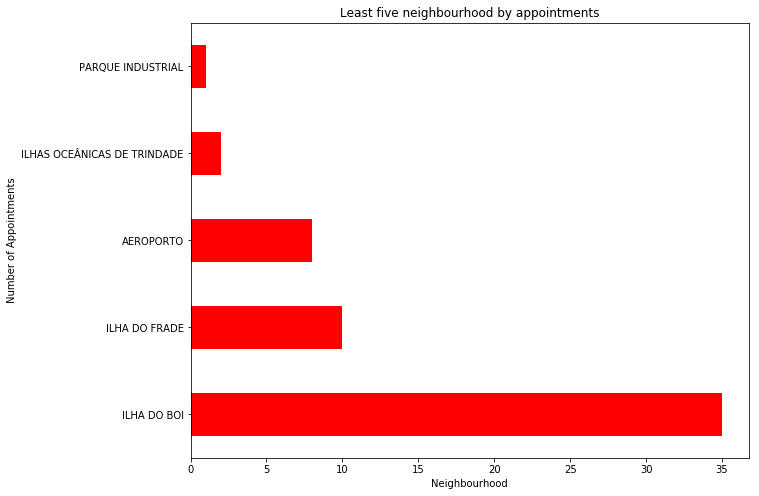

In [51]:
#this code plots the frequency of top 5 neighbourhood by appointments
df["neighbourhood"].value_counts().tail().plot(kind='barh',title='Least five neighbourhood by appointments',color="red",figsize=(10,8))
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Appointments');

### Research Question 10: What is the distribution of diseases?

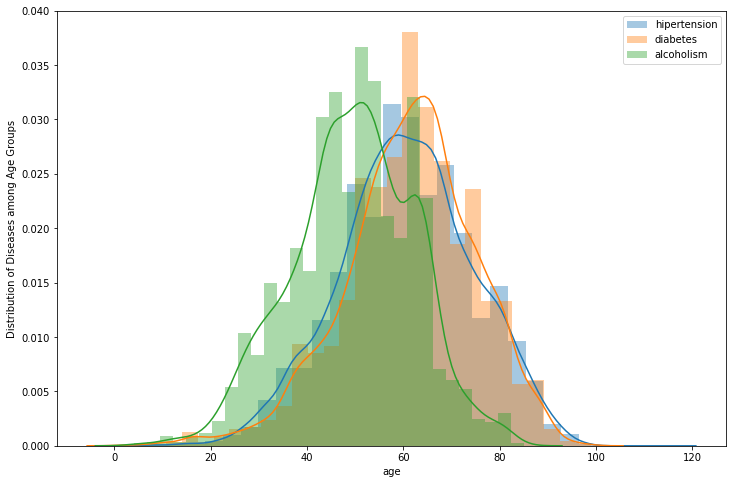

In [72]:
#this code shows a plot of the distribution of the diseases
plt.figure(figsize=(12,8))
hipertension_age= df[df["hipertension"]==1]["age"]
diabetic_age= df[df["diabetes"]==1]["age"]
alcoholics_age= df[df["alcoholism"]==1]["age"]

bins=[20,40,60,80,100,120]

sns.distplot(hipertension_age, bins=30, label='hipertension')
sns.distplot(diabetic_age, bins=30, label='diabetes')
sns.distplot(alcoholics_age, bins=30, label='alcoholism')
plt.ylabel('Distribution of Diseases among Age Groups')
plt.legend()

### Research Question 11: Which day of the week witness the most turn out (i.e no show == "No") ?


In [137]:
#this code creates another feature "day_of_week" to the dataframe
df['day_of_week'] = df['appointment_day'].dt.weekday_name
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'no_show', 'day_of_week'],
      dtype='object')

In [138]:
#this code outputs the number of "No" and "Yes" in the no_show column
df['no_show'].value_counts()

No     88207
Yes    22319
Name: no_show, dtype: int64

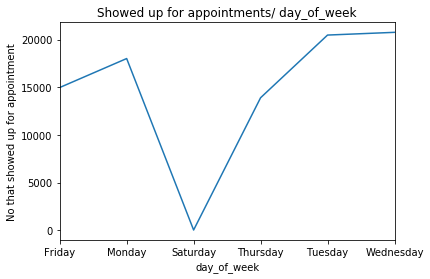

In [143]:
#this code returns the plot of appointment turnout per day_of_week
came_for_appointment= df[df["no_show"]=="No"]
came_for_appointment.groupby('day_of_week')["no_show"].count().plot();
plt.ylabel("No that showed up for appointment");
plt.title("Showed up for appointments/ day_of_week");

#### Saturday withnessed the least turn out for appointments while Wednesday witnessed the most turnout

In [89]:
missed_appointment=df[df["no_show"]=="Yes"]
missed_appointment.groupby('day_of_week')["no_show"].count()

day_of_week
Friday       4037
Monday       4690
Saturday        9
Thursday     3338
Tuesday      5152
Wednesday    5093
Name: no_show, dtype: int64

In [103]:
missed_appointment.groupby('sms_received')["sms_received"].count()

sms_received
0    12535
1     9784
Name: sms_received, dtype: int64

In [102]:
came_for_appointment.groupby('sms_received')["sms_received"].count()

sms_received
0    62509
1    25698
Name: sms_received, dtype: int64

In [105]:
df[df["sms_received"]==1].groupby("no_show")["no_show"].count()

no_show
No     25698
Yes     9784
Name: no_show, dtype: int64

### Research Question 12: What is the possible relationship between no-show appointment and SMS notification received?

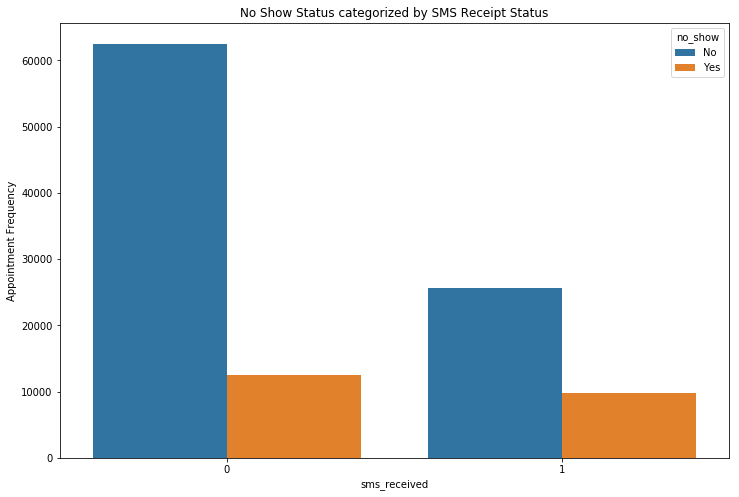

In [145]:
#this code shows the countplot of no shows categorised by sms_received
plt.figure(figsize=(12,8))
appt_sms = sns.countplot(x = 'sms_received', hue = 'no_show', data = df)
appt_sms.set_title('No Show Status categorized by SMS Receipt Status')
plt.xlabel('sms_received')
plt.ylabel('Appointment Frequency');


### Research Question 13: What is the possible relationship between no-show appointment and Gender

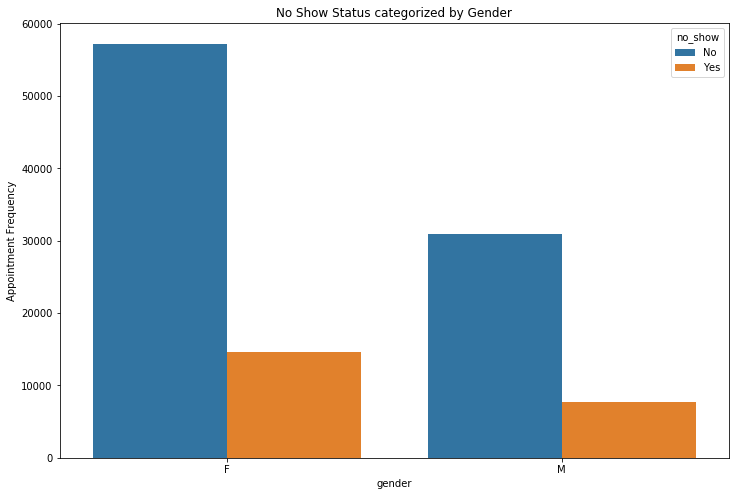

In [109]:
plt.figure(figsize=(12,8))
appt_sms = sns.countplot(x = 'gender', hue = 'no_show', data = df)
appt_sms.set_title('No Show Status categorized by Gender')
plt.xlabel('gender')
plt.ylabel('Appointment Frequency')
plt.show()

<a id='conclusions'></a>
## Conclusions



* There are 81 unique neighboorhood
* There are 3539 patients less than a year old
* The oldest female patient is 115 years old while the oldest male patient is 100 years old
* Only alcoholism witnessed more cases in men than other diseases
* Wednesday has the highest number of turn out (i.e no show=="No") for appointments
* Cases of alcoholism increase starting at early 20s while diabetes and hypertension do not increase until early 40s.
* There are fewer no shows for patients who did not receive a SMS notification.

In [146]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295